In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# for inline graphs
%matplotlib inline

# Load dataset
df = pd.read_csv('netflix_titles.csv')

# Display first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Dataset shape and column info
print("Dataset shape:", df.shape)
print("\nColumn info:")
df.info()

# Check missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (8807, 12)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
durati

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Clean columns
df.loc[:, 'country'] = df['country'].fillna('Unknown')
df.loc[:, 'director'] = df['director'].fillna('Unknown')
df.loc[:, 'cast'] = df['cast'].fillna('Unknown')

# Clean 'date_added'
df.dropna(subset=['date_added'], inplace=True)
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


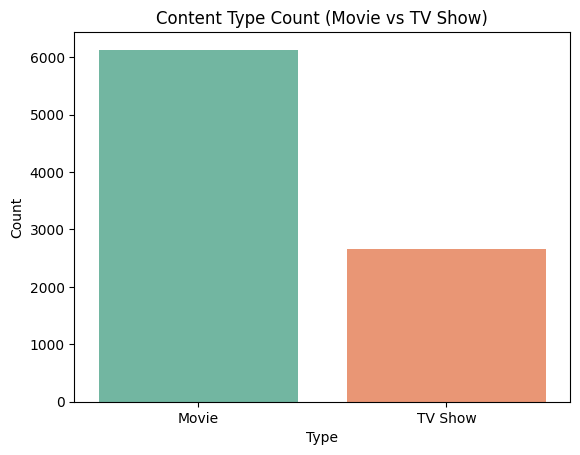

In [8]:
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Content Type Count (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


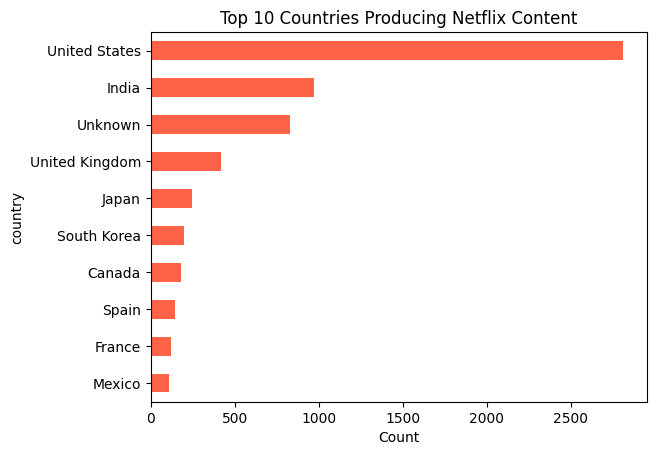

In [9]:
#TOP 10 PRODUCING COMPANY 
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='tomato')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

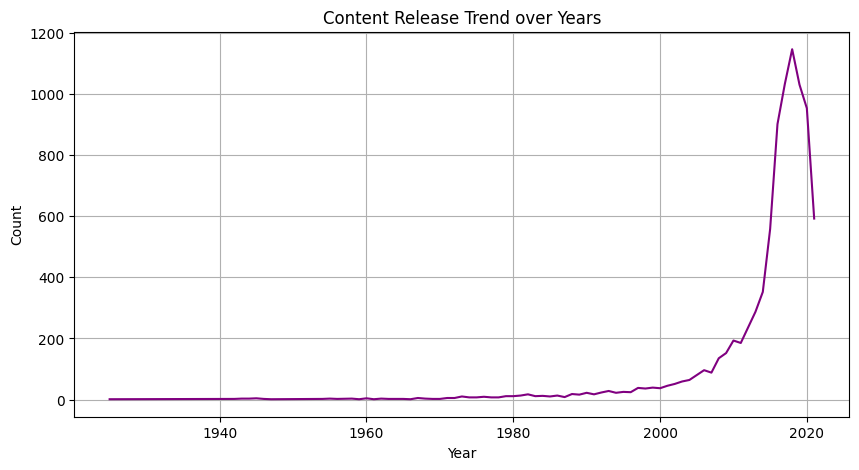

In [10]:
#CONTENT OVER YEARS 
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5), color='purple')
plt.title('Content Release Trend over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

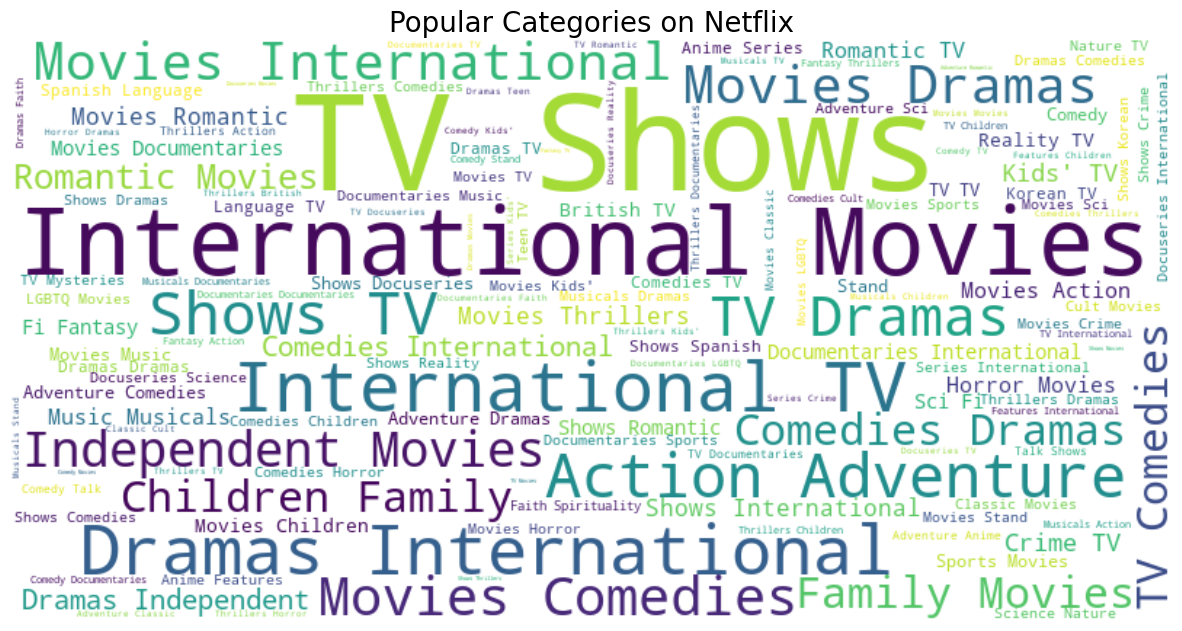

In [11]:
#GENRE
text = " ".join(df['listed_in'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Categories on Netflix", fontsize=20)
plt.show()

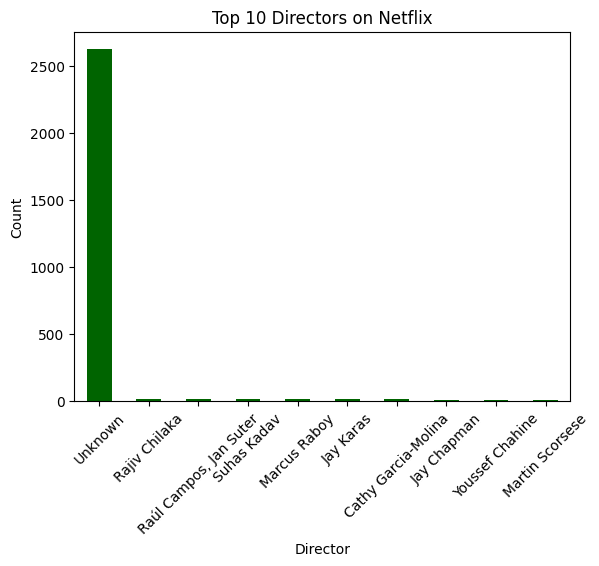

In [12]:
#MOST FREQUENT DIRECTORS AND CAST 
# Top 10 directors
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='bar', color='darkgreen')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Director")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### 🔍 Key Insights

- Netflix has more Movies than TV Shows.
- The USA produces the most content on Netflix.
- Content production peaked after 2017.
- Drama, International Movies, and Comedies are the most common genres.
- Popular directors include Rajiv Chilaka and Raúl Campos.

This analysis can help understand user preferences and content trends for strategic decisions.
